In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("package_report.csv")

gri = df[df["mechanism"] == "gri30.yaml"]
estimate = df[df["mechanism"] == "mechanism/ESTiMatE-Mech_04042022.xml"]
h2 = df[df["mechanism"] == "mechanism/h2_li_2004.xml"]


min_gri = gri["calc_time[s]"].min()
opt_gri = gri[gri["calc_time[s]"] == min_gri]
min_pack_gri = opt_gri["package"]
print("Optimal package size for gri3.0 mechanisms: {}".format(min_pack_gri.values[0]))
opt_gri

Optimal package size for gri3.0 mechanisms: 60


,mechanism,threads,package,points,read_time[s],calc_time[s],write_time[s]
11,gri30.yaml,4,60,500,0.006146,0.108347,0.009438


In [2]:
min_est = estimate["calc_time[s]"].min()
opt_est = estimate[estimate["calc_time[s]"] == min_est]
min_pack_est = opt_est["package"]
print("Optimal package size for ESTiMatE mechanisms: {}".format(min_pack_est.values[0]))
opt_est

Optimal package size for ESTiMatE mechanisms: 65


,mechanism,threads,package,points,read_time[s],calc_time[s],write_time[s]
32,mechanism/ESTiMatE-Mech_04042022.xml,4,65,500,0.009554,15.5032,0.052151


In [3]:
min_h2 = h2["calc_time[s]"].min()
opt_h2 = h2[h2["calc_time[s]"] == min_h2]
min_pack_h2 = opt_h2["package"]
print("Optimal package size for H2 mechanisms: {}".format(min_pack_h2.values[0]))
opt_h2

Optimal package size for H2 mechanisms: 25


,mechanism,threads,package,points,read_time[s],calc_time[s],write_time[s]
44,mechanism/h2_li_2004.xml,4,25,500,0.002377,0.562835,0.002465


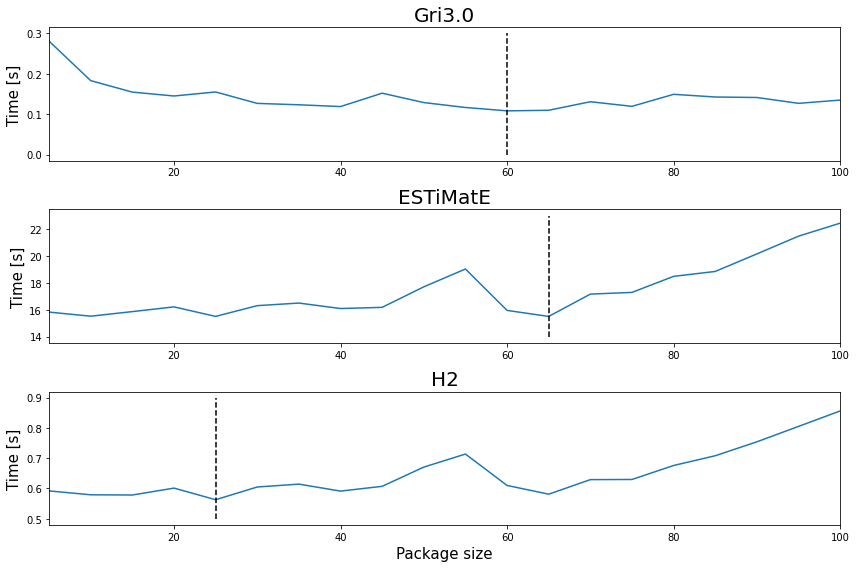

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,8))

ax[0].plot(gri["package"], gri["calc_time[s]"])
ax[0].plot(np.ones(51)*min_pack_gri.values[0], np.linspace(0.0,0.3,51),'--', color='black')

ax[1].plot(estimate["package"], estimate["calc_time[s]"])
ax[1].plot(np.ones(51)*min_pack_est.values[0], np.linspace(14.0,23.0,51),'--', color='black')

ax[2].plot(h2["package"], h2["calc_time[s]"])
ax[2].plot(np.ones(51)*min_pack_h2.values[0], np.linspace(0.5,0.9,51),'--', color='black')

titles = ["Gri3.0", "ESTiMatE", "H2"]
for i in range(3):
    ax[i].set_ylabel("Time [s]", fontsize = 15)
    ax[i].set_title(titles[i],fontsize = 20)
    ax[i].set_xlim(5,100)
    ylimits = ax[i].get_ylim()
    ax[i].set_ylim(ylimits[0],ylimits[1])

ax[2].set_xlabel("Package size", fontsize = 15)
fig.tight_layout()

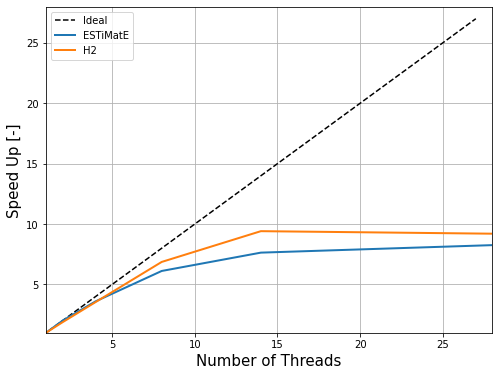

In [11]:
df = pd.read_csv("speedup_report.csv")
#speed_gri = df[df["mechanism"] == "gri30.yaml"]
speed_est = df[df["mechanism"] == "mechanism/ESTiMatE-Mech_04042022.xml"]
speed_h2 = df[df["mechanism"] == "mechanism/h2_li_2004.xml"]

#speed_gri.assign(speedup = speed_gri["calc_time[s]"].max() / speed_gri["calc_time[s]"])
speed_est = speed_est.assign(speedup = speed_est["calc_time[s]"].max() / speed_est["calc_time[s]"])
speed_h2 = speed_h2.assign(speedup = speed_h2["calc_time[s]"].max() / speed_h2["calc_time[s]"])

fig, ax = plt.subplots(figsize = (8,6))

ax.plot(range(0,28),range(0,28), '--', color='black',label='Ideal')
ax.plot(speed_est["threads"], speed_est["speedup"], linewidth=2, label="ESTiMatE")
ax.plot(speed_h2["threads"], speed_h2["speedup"], linewidth=2, label="H2")

ax.set_xlabel("Number of Threads",fontsize=15)
ax.set_ylabel("Speed Up [-]",fontsize=15)
ax.set_xlim(1,28)
ax.set_ylim(1,28)

ax.legend()
ax.grid()

plt.show()

